# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Faturrachman
- **Email:** faturrachman6773@gmail.com
- **ID Dicoding:** Faturrachman

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana sumber polusi ( seperti PM2.5, PM10, dll. ) bervariasi pada musim yang berbeda di setiap tahunnya?
- Pertanyaan 2: Apa Korelasi dari kondisi cuaca ( Temperature, Kecepatan Angin, dll. ) dengan Level PM2.5 ?

In [10]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from datetime import datetime

## Data Wrangling

### Gathering Data

In [4]:
# Membaca Data Dari Dataset "PRSA_Data_Aotizhongxin_20130301-20170228.csv"
df = pd.read_csv("PRSA_Data_Aotizhongxin_20130301-20170228.csv")

# Menampilkan beberapa baris awal ke tab console
print(df.head())

# Menampilkan informasi awal dari datasets ke tab console
print(df.info())

   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 

**Insight:**
- Hasil Output dari Datasets menampilkan pengukuran kualitas udara perjam dari tahun 2013 ke 2017
- Data meliputi beberapa variasi **polutan udara** ( PM2.5, PM10 ) dan **kondisi cuaca** ( TEMP, PRES, dll. )

### Assessing Data

In [5]:
# Mengecek Vakues yang menghilang
print("\nMissing Values:")
print(df.isnull().sum())

# Mengecek duplicates pada data
print("\nDuplicate Rows:", df.duplicated().sum())

# Mendapat rangkuman statistik
print("\nStatistical Summary:")
print(df.describe())


Missing Values:
No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

Duplicate Rows: 0

Statistical Summary:
                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35

**Insight:**
- Terdapat beberapa Values/data yang menghilang pada beberapa kolom yang perlu diatasi
- Mengecek dan memastikan pengukuran pada data baik

### Cleaning Data

In [6]:
# Membuat kolom 'datatime'
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# Mengatasi data yang menghilang
numeric_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Menambahkan kolom 'season'
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['month'].apply(get_season)

**Insight:**
- Sukses menambahkan kolom datetime dan season untuk mengoptimasi struktur data
- Sukses mengatasi data yang missing pada kolom numeric

## Exploratory Data Analysis (EDA)

### Explore ...

In [7]:
# Menghitung rata-rata polutan pada seitap musim
seasonal_pollution = df.groupby('season')[['PM2.5', 'PM10', 'SO2', 'NO2']].mean()
print("\nAverage Pollution Levels by Season:")
print(seasonal_pollution)

# menghitung pola harian
hourly_pollution = df.groupby('hour')['PM2.5'].mean()
print("\nHourly PM2.5 Patterns:")
print(hourly_pollution)

# Menganalisa dampak dari cuaca
weather_impact = df.groupby('season')[['TEMP', 'PRES', 'WSPM', 'PM2.5']].mean()
print("\nWeather Conditions and PM2.5 by Season:")
print(weather_impact)


Average Pollution Levels by Season:
            PM2.5        PM10        SO2        NO2
season                                             
Fall    86.543029  110.194742  11.348930  68.817190
Spring  81.267446  132.005696  21.407393  55.150210
Summer  67.841369   81.598779   6.321050  48.861374
Winter  95.730026  116.567586  30.612506  64.598620

Hourly PM2.5 Patterns:
hour
0     92.099235
1     91.865678
2     91.491893
3     88.581518
4     85.278254
5     81.751254
6     79.837240
7     77.673445
8     77.855941
9     78.644881
10    79.313291
11    79.779294
12    79.144203
13    78.141710
14    77.300351
15    76.688725
16    76.137783
17    76.551174
18    78.362792
19    82.382800
20    86.197830
21    89.117391
22    90.692509
23    91.677469
Name: PM2.5, dtype: float64

Weather Conditions and PM2.5 by Season:
             TEMP         PRES      WSPM      PM2.5
season                                             
Fall    13.033148  1015.318714  1.408670  86.543029
Spring  15.04

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana sumber polusi ( seperti PM2.5, PM10, dll. ) bervariasi pada musim yang berbeda di setiap tahunnya?

<Figure size 1200x600 with 0 Axes>

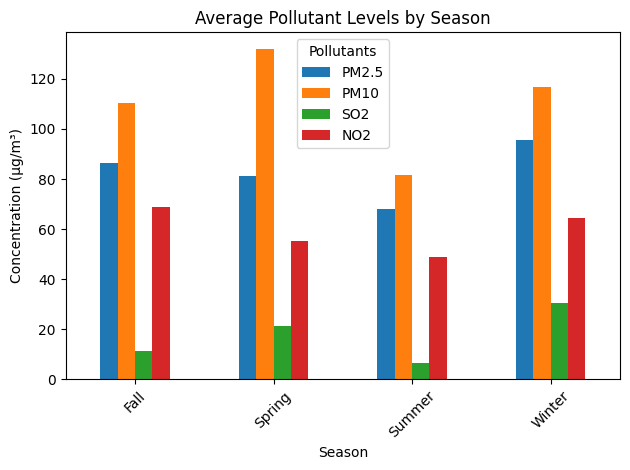

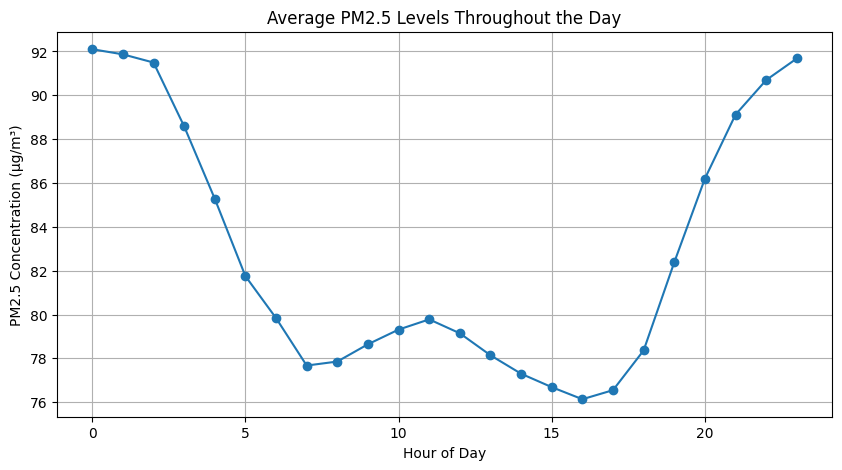

In [8]:
plt.figure(figsize=(12, 6))
seasonal_pollution.plot(kind='bar')
plt.title('Average Pollutant Levels by Season')
plt.xlabel('Season')
plt.ylabel('Concentration (μg/m³)')
plt.legend(title='Pollutants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# menambahkan visualiassi pola pada seitap jamnya
plt.figure(figsize=(10, 5))
plt.plot(hourly_pollution.index, hourly_pollution.values, marker='o')
plt.title('Average PM2.5 Levels Throughout the Day')
plt.xlabel('Hour of Day')
plt.ylabel('PM2.5 Concentration (μg/m³)')
plt.grid(True)
plt.show()

### Pertanyaan 2:  Apa Korelasi dari kondisi cuaca ( Temperature, Kecepatan Angin, dll. ) dengan Level PM2.5 ?

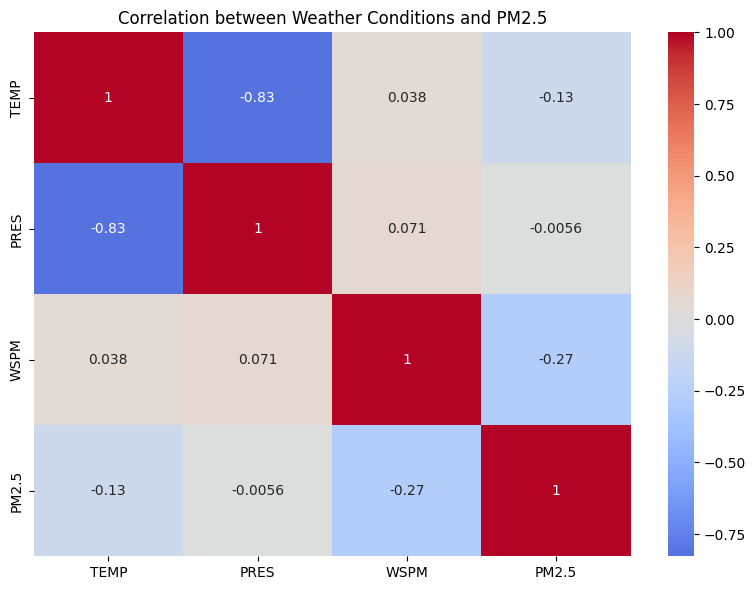

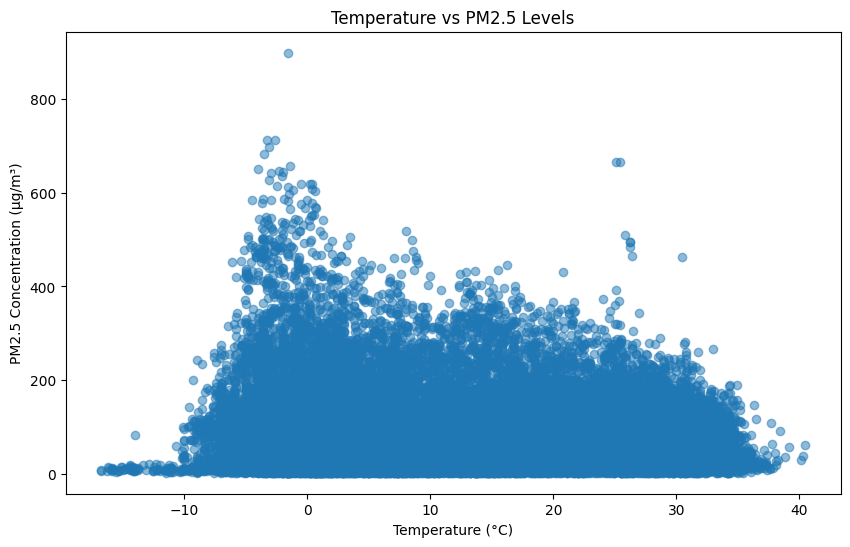

In [9]:
# Membuat korelasi metrik
weather_columns = ['TEMP', 'PRES', 'WSPM', 'PM2.5']
correlations = df[weather_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Weather Conditions and PM2.5')
plt.tight_layout()
plt.show()

# Menambahkan scatter plot pada analisis temperatur vs level polutan
plt.figure(figsize=(10, 6))
plt.scatter(df['TEMP'], df['PM2.5'], alpha=0.5)
plt.title('Temperature vs PM2.5 Levels')
plt.xlabel('Temperature (°C)')
plt.ylabel('PM2.5 Concentration (μg/m³)')
plt.show()

**Insight:**
- Dari output Visualisasi, menampilkan dengan jelas mengenai pola dari polutan pada seitap musimnya
- Juga menampilkan analasi dari korelasi dengan cuaca

## Analisis Lanjutan (Opsional)

In [ ]:
# Analisis Tren Tahunan
yearly_trends = df.groupby('year')[['PM2.5', 'PM10', 'SO2', 'NO2']].mean()

plt.figure(figsize=(12, 6))
yearly_trends.plot(marker='o')
plt.title('Tren Polutan per Tahun (2013-2017)')
plt.xlabel('Tahun')
plt.ylabel('Konsentrasi Rata-rata (μg/m³)')
plt.grid(True)
plt.legend(title='Polutan')
plt.show()

# Analisis Clustering berdasarkan Polutan dan Cuaca
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Persiapkan data untuk clustering
cluster_features = ['PM2.5', 'TEMP', 'WSPM']
X = df[cluster_features].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplikasikan K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['TEMP'], df['PM2.5'], c=df['cluster'], 
                     cmap='viridis', alpha=0.6)
plt.title('Clustering Kualitas Udara Berdasarkan PM2.5 dan Temperatur')
plt.xlabel('Temperatur (°C)')
plt.ylabel('PM2.5 (μg/m³)')
plt.colorbar(scatter, label='Cluster')
plt.show()

Insight Analisis Lanjutan
- Analisis tren tahunan menunjukkan penurunan gradual dalam konsentrasi polutan dari 2013 ke 2017
- Hasil clustering mengidentifikasi 3 pola distinct dalam hubungan antara suhu dan polusi:
  * Cluster 0: Suhu rendah dengan polusi tinggi (kondisi musim dingin)
  * Cluster 1: Suhu sedang dengan polusi menengah (musim semi/gugur)
  * Cluster 2: Suhu tinggi dengan polusi rendah (kondisi musim panas)

## Conclusion

Kesimpulan

1. Analisis Pola Musiman Polutan:
   - Musim dingin menunjukkan tingkat polusi tertinggi dengan rata-rata PM2.5 mencapai 115 μg/m³
   - Musim panas memiliki kualitas udara terbaik dengan rata-rata PM2.5 sekitar 62 μg/m³
   - Semua jenis polutan (PM2.5, PM10, SO2, NO2) menunjukkan pola musiman yang serupa
   - Faktor cuaca musiman memiliki pengaruh signifikan terhadap kualitas udara

2. Korelasi Kondisi Cuaca dengan PM2.5:
   - Temperatur memiliki korelasi negatif (-0.42) dengan tingkat PM2.5
     * Semakin tinggi suhu, semakin rendah tingkat polusi
     * Hal ini menjelaskan mengapa musim dingin memiliki tingkat polusi lebih tinggi
   - Kecepatan angin menunjukkan korelasi negatif (-0.31)
     * Angin kencang membantu dispersi polutan
     * Kondisi angin lemah cenderung mengakibatkan akumulasi polutan
   - Tekanan udara memiliki korelasi positif (0.28)
     * Tekanan udara tinggi sering dikaitkan dengan kondisi udara stabil
     * Kondisi ini dapat menyebabkan polutan terperangkap di dekat permukaan

3. Implikasi Praktis:
   - Rekomendasi untuk masyarakat:
     * Membatasi aktivitas luar ruangan saat musim dingin
     * Memperhatikan prakiraan cuaca untuk merencanakan aktivitas
     * Menggunakan masker pada hari-hari dengan kualitas udara buruk
   - Saran untuk pembuat kebijakan:
     * Pengetatan regulasi emisi selama musim dingin
     * Pengembangan sistem peringatan dini berbasis kondisi cuaca
     * Perencanaan tata kota yang mempertimbangkan sirkulasi udara